Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

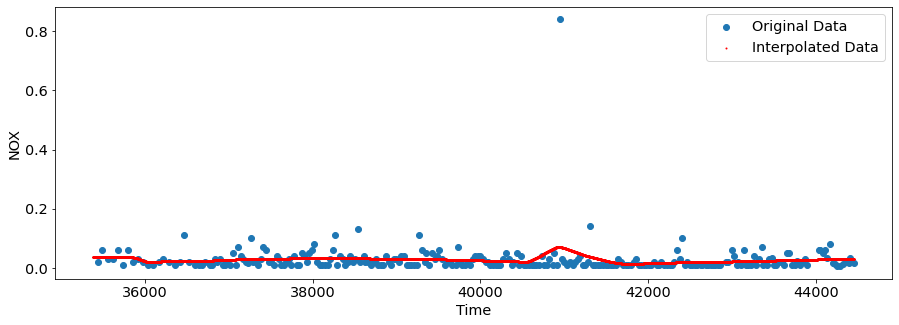

313/313 [==============================] - 0s 426us/step - loss: 2.9667e-18
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//NOX/saved_model/my_modelBB05A_NOX')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/NOX_data/BB05A.csv")
time = df['time'].values
NOX = df['NOX'].values
df

#Transform the normalized scale to real scale
NOX_min = 0.005
NOX_max = 0.84
time_min = 35436.47                  
time_max = 44452.48                      

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(NOX_max - NOX_min) + NOX_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, NOX*(NOX_max - NOX_min) + NOX_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('NOX')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.003385723
,0.009929641
,0.016695387
,0.023461134
,0.03022688
,0.036992626
,0.043869286
,0.050413204
,0.05717895
,0.063944696
,0.070710443
,0.077476189
,0.084352849
,0.090896767
,0.097662513
,0.104428259
,0.111194006
,0.117959752
,0.124836412
,0.131491244
,0.145022736
,0.826921215
,0.941717072
,0.945044488
,0.948482818
])
interpolation

array([[0.03994657],
       [0.03976833],
       [0.03958404],
       [0.03939975],
       [0.03921547],
       [0.03858361],
       [0.03725268],
       [0.03468788],
       [0.0268346 ],
       [0.01960309],
       [0.01930854],
       [0.01967394],
       [0.02004532],
       [0.02039874],
       [0.02076413],
       [0.02112953],
       [0.02149493],
       [0.02186032],
       [0.02223171],
       [0.02259112],
       [0.02323485],
       [0.01916446],
       [0.02736443],
       [0.02760945],
       [0.0278626 ]], dtype=float32)